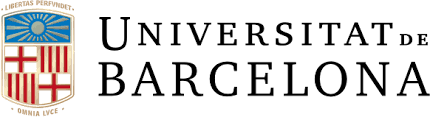

##*Master en Big Data & Data Science*

### **TFM: Clasificación de enfermedades en imágenes médicas utilizando técnicas de Deep Learning**
---

**Alumnos:**
* Santiago Rico Bartolome
* Claudia Alcazar Ureña
* Andres Villa
* Steve Solano Bermudez

**Profesor Tutor:** Ferran Arroyo Vendrell

**Importamos la librerias necesarias para el analisis**

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
#tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**Montaje de Google Drive:** Se monta la unidad de Google Drive para acceder a los directorios de entrenamiento y prueba que contienen las imágenes.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
training_data_dir = '/content/drive/MyDrive/Training'
testing_data_dir = '/content/drive/MyDrive/Testing'



*Mostramos algunas imagenes: Glioma*

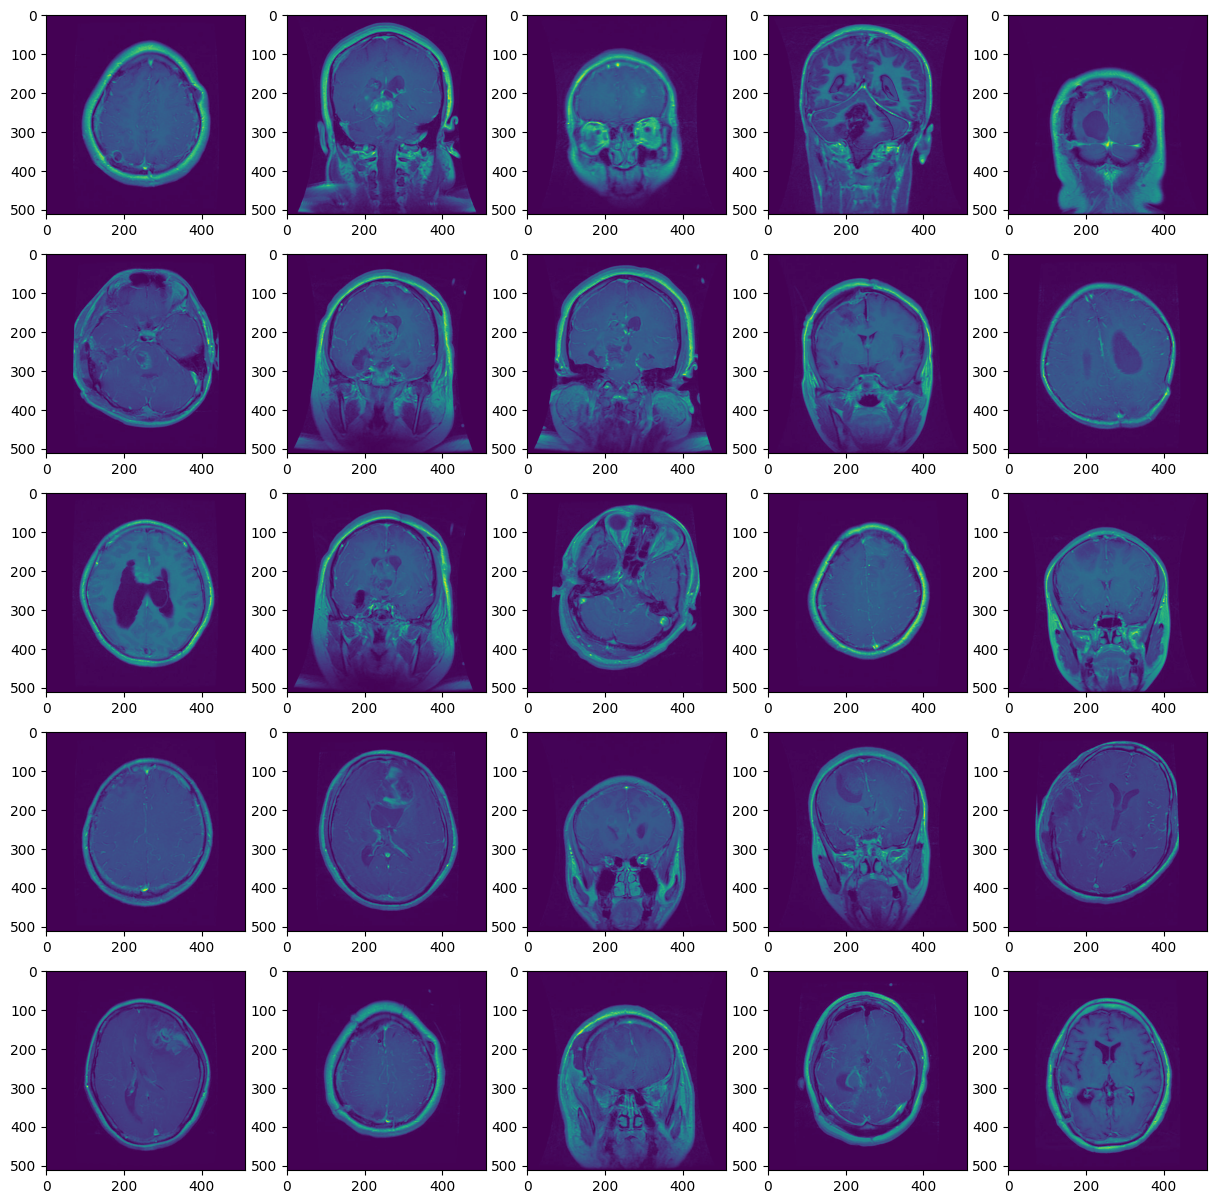

In [4]:
#Mostrar algunas imagenes con pyplot, en este caso: 'Gliomas'
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

folder = '/content/drive/MyDrive/Training/glioma'
images = os.listdir(folder)

for i, nameimg in enumerate(images[:25]):
  plt.subplot(5,5,i+1)
  image = mpimg.imread(folder + '/' + nameimg)
  plt.imshow(image)

**Configuración de generadores de datos de imagen:** Se configuran los generadores de datos de imagen para el conjunto de entrenamiento y el conjunto de prueba. Estos generadores realizan la carga y el preprocesamiento de las imágenes, como la normalización y el aumento de datos.

In [5]:
# Configuración de aumento de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rango de rotación aleatoria de 20 grados
    width_shift_range=0.1,  # Desplazamiento horizontal aleatorio de 10% del ancho
    height_shift_range=0.1,  # Desplazamiento vertical aleatorio de 10% de la altura
    shear_range=0.2,  # Sesgo de cizallamiento aleatorio
    zoom_range=0.2,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    vertical_flip=False  # Sin volteo vertical
)

# Configuración de aumento de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)

# Configuración de aumento de datos para el conjunto de prueba (solo reescalado)
test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar las imágenes de entrenamiento desde la carpeta de entrenamiento
train_generator = train_datagen.flow_from_directory(
    training_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Cargar las imágenes de prueba desde la carpeta de prueba
test_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [6]:
#obtenemos el nombnre de las clases que estamos usando
class_names = train_generator.class_indices
class_names = list(class_names.keys())
print("Nombres de las clases en Training:", class_names)

class_names = test_generator.class_indices
class_names = list(class_names.keys())
print("Nombres de las clases en Testing:", class_names)


Nombres de las clases en Training: ['glioma', 'meningioma', 'notumor', 'pituitary']
Nombres de las clases en Testing: ['glioma', 'meningioma', 'notumor', 'pituitary']


**Utilizacion de la tecnica *Transfer Learning***

Se construye el modelo utilizando Transfer Learning con el modelo *VGG16* como base.

El modelo *VGG16* es una arquitectura de red neuronal convolucional profunda que ha sido pre-entrenada en el conjunto de datos *ImageNet*, que consta de millones de imágenes de diferentes categorías. Este proceso de entrenamiento previo ha permitido al modelo *VGG16* aprender a reconocer patrones visuales y características en imágenes de manera efectiva.

In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [8]:
for layer in base_model.layers:
    layer.trainable = False


In [9]:
model = Sequential()
model.add(base_model)
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**Entrenamiento del modelo:** El modelo se entrena utilizando los datos de entrenamiento proporcionados durante un número determinado de épocas, en este caso 10.

In [11]:
history=model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10)


Epoch 1/10
179/179 [==============================] - 748s 4s/step - loss: 0.4882 - accuracy: 0.8102
Epoch 2/10
179/179 [==============================] - 31s 173ms/step - loss: 0.2695 - accuracy: 0.9016
Epoch 3/10
179/179 [==============================] - 30s 169ms/step - loss: 0.1779 - accuracy: 0.9359
Epoch 4/10
179/179 [==============================] - 31s 172ms/step - loss: 0.1235 - accuracy: 0.9545
Epoch 5/10
179/179 [==============================] - 31s 172ms/step - loss: 0.1053 - accuracy: 0.9594
Epoch 6/10
179/179 [==============================] - 31s 172ms/step - loss: 0.0752 - accuracy: 0.9732
Epoch 7/10
179/179 [==============================] - 32s 180ms/step - loss: 0.0515 - accuracy: 0.9811
Epoch 8/10
179/179 [==============================] - 31s 172ms/step - loss: 0.0533 - accuracy: 0.9818
Epoch 9/10
179/179 [==============================] - 31s 171ms/step - loss: 0.0340 - accuracy: 0.9881
Epoch 10/10
179/179 [==============================] - 31s 171ms/step - los

In [12]:
# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/trained_model.h5')

**Evaluación del modelo:** El modelo se evalúa utilizando los datos de prueba y se calculan las métricas de rendimiento, como la precisión.

In [13]:
test_predict=model.evaluate(test_generator, steps=len(test_generator))


41/41 [==============================] - 279s 7s/step - loss: 0.1012 - accuracy: 0.9695


**Matriz de Confusion**

41/41 [==============================] - 7s 177ms/step


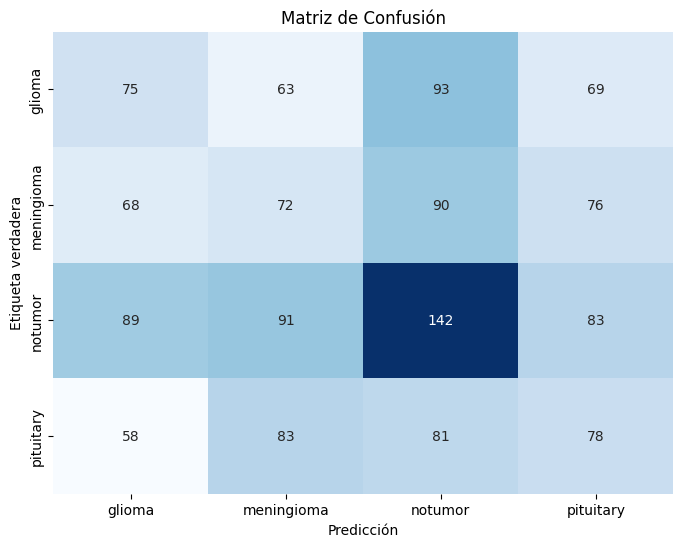

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo para el conjunto de prueba
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Función para mostrar la matriz de confusión
def plot_confusion_matrix(confusion_mtx, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xticks(np.arange(len(class_names)) + 0.5, class_names)
    plt.yticks(np.arange(len(class_names)) + 0.5, class_names)
    plt.xlabel('Predicción')
    plt.ylabel('Etiqueta verdadera')
    plt.title('Matriz de Confusión')
    plt.show()

# Mostrar la matriz de confusión
class_names = test_generator.class_indices
class_names = list(class_names.keys())
plot_confusion_matrix(confusion_mtx, class_names)


**Utilizacion del Modelo para predecir una imagen de prueba**

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Cargar el modelo entrenado
model = load_model('/content/drive/MyDrive/trained_model.h5')

# Ruta de la imagen de prueba
test_image_path = '/content/image.jpeg'


# Cargar y preprocesar la imagen de prueba
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalizar los valores de píxeles

# Realizar la predicción en la imagen de prueba
predictions = model.predict(img_array)
class_index = np.argmax(predictions[0])
probability = predictions[0][class_index]

# Obtener el nombre de la clase predicha
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
predicted_class = class_names[class_index]

# Imprimir la clase predicha y la probabilidad
print("Clase predicha: ", predicted_class)
print("Probabilidad: {:.2f}%".format(probability * 100))


1/1 [==============================] - 0s 382ms/step
Clase predicha:  pituitary
Probabilidad: 100.00%
